<a href="https://colab.research.google.com/github/Binod1028/Concepts-and-Technologies-of-AI-Final-Assessment/blob/main/Classification_Task_Binod_Chaudhary_2517284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 2. Data Loading and Preprocessing

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Neural Network libraries
from sklearn.neural_network import MLPClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Final_data.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [5]:
# Display basic information about the dataset
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Fre

In [6]:
# Check for missing values
print("Missing Values Summary:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

Missing Values Summary:
No missing values found in the dataset!


In [7]:
# Check target variable distribution
print("Target Variable Distribution:")
print("="*50)
print(df['Burns_Calories_Bin'].value_counts())
print("\nPercentage Distribution:")
print(df['Burns_Calories_Bin'].value_counts(normalize=True) * 100)

Target Variable Distribution:
Burns_Calories_Bin
Low          5003
High         5000
Very High    5000
Medium       4997
Name: count, dtype: int64

Percentage Distribution:
Burns_Calories_Bin
Low          25.015
High         25.000
Very High    25.000
Medium       24.985
Name: proportion, dtype: float64


---
## 3. Exploratory Data Analysis

### 3.1 Statistical Summary

In [8]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print("="*50)
df.describe().T

Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Age,20000.0,3.885145e+01,1.211458e+01,1.800000e+01,2.817000e+01,3.986500e+01,4.963000e+01,5.967000e+01
Weight (kg),20000.0,7.389883e+01,2.117301e+01,3.918000e+01,5.816000e+01,7.000000e+01,8.610000e+01,1.307700e+02
Height (m),20000.0,1.723093e+00,1.270328e-01,1.490000e+00,1.620000e+00,1.710000e+00,1.800000e+00,2.010000e+00
Max_BPM,20000.0,1.798897e+02,1.151081e+01,1.593100e+02,1.700575e+02,1.801400e+02,1.894250e+02,1.996400e+02
Avg_BPM,20000.0,1.437043e+02,1.426769e+01,1.190700e+02,1.312200e+02,1.429900e+02,1.560600e+02,1.698400e+02
Resting_BPM,20000.0,6.219581e+01,7.289351e+00,4.949000e+01,5.596000e+01,6.220000e+01,6.809000e+01,7.450000e+01
Session_Duration (hours),20000.0,1.259446e+00,3.413362e-01,4.900000e-01,1.050000e+00,1.270000e+00,1.460000e+00,2.020000e+00
Calories_Burned,20000.0,1.280110e+03,5.022290e+02,3.231100e+02,9.108000e+02,1.231450e+03,1.553112e+03,2.890820e+03
Fat_Percentage,20000.0,2.610131e+01,4.996160e+00,1.133313e+01,2.238781e+01,2.582250e+01,2.967603e+01,3.500000e+01
Water_Intake (liters),20000.0,2.627485e+00,6.047240e-01,1.460000e+00,2.170000e+00,2.610000e+00,3.120000e+00,3.730000e+00


### 3.2 Data Visualization

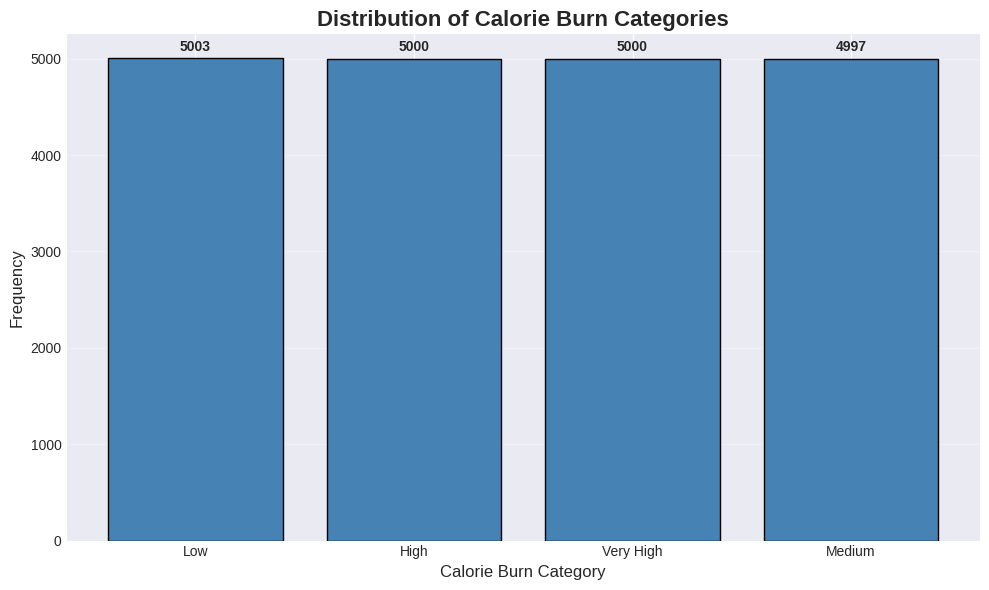

Insight: The target variable shows the distribution of different calorie burn categories.
The dataset appears to be relatively balanced across categories.


In [9]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
target_counts = df['Burns_Calories_Bin'].value_counts()
plt.bar(target_counts.index, target_counts.values, color='steelblue', edgecolor='black')
plt.title('Distribution of Calorie Burn Categories', fontsize=16, fontweight='bold')
plt.xlabel('Calorie Burn Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: The target variable shows the distribution of different calorie burn categories.")
print("The dataset appears to be relatively balanced across categories.")

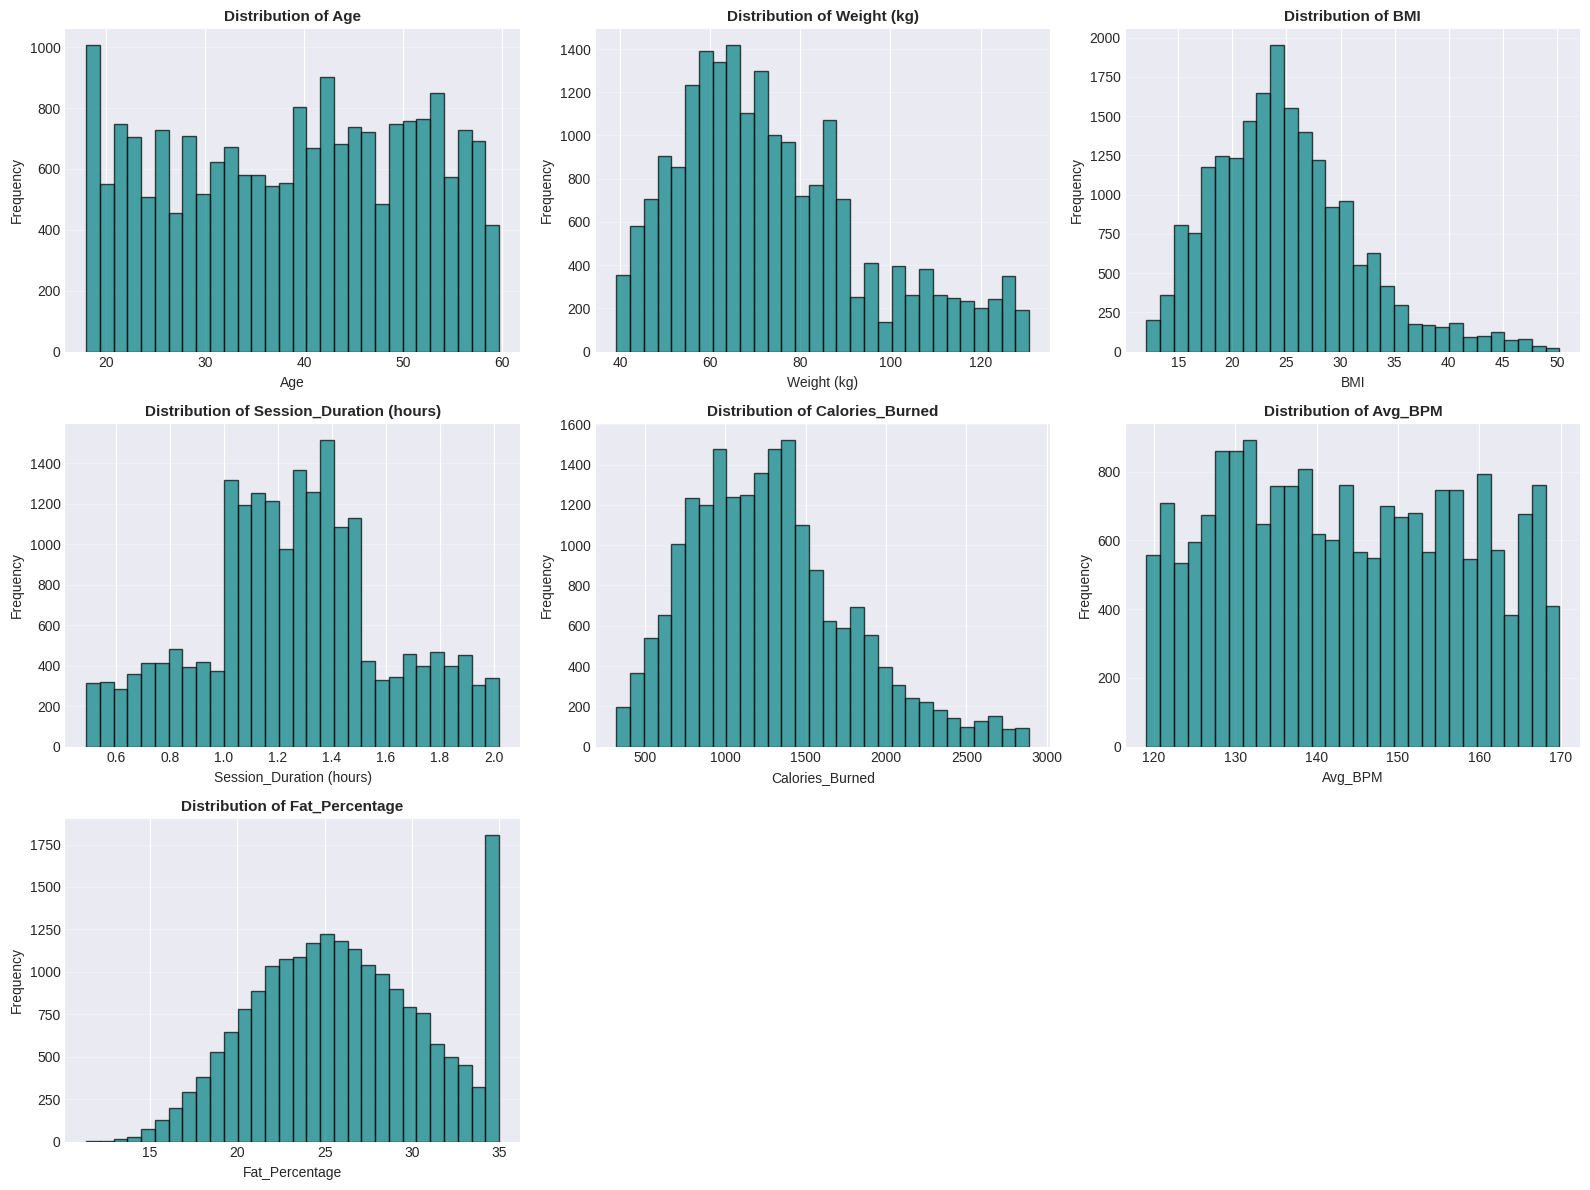

Insight: These histograms show the distribution of key numerical features.
Most features show reasonable distributions without extreme skewness.


In [10]:
# Analyze key numerical features
key_features = ['Age', 'Weight (kg)', 'BMI', 'Session_Duration (hours)',
                'Calories_Burned', 'Avg_BPM', 'Fat_Percentage']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(key_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("Insight: These histograms show the distribution of key numerical features.")
print("Most features show reasonable distributions without extreme skewness.")

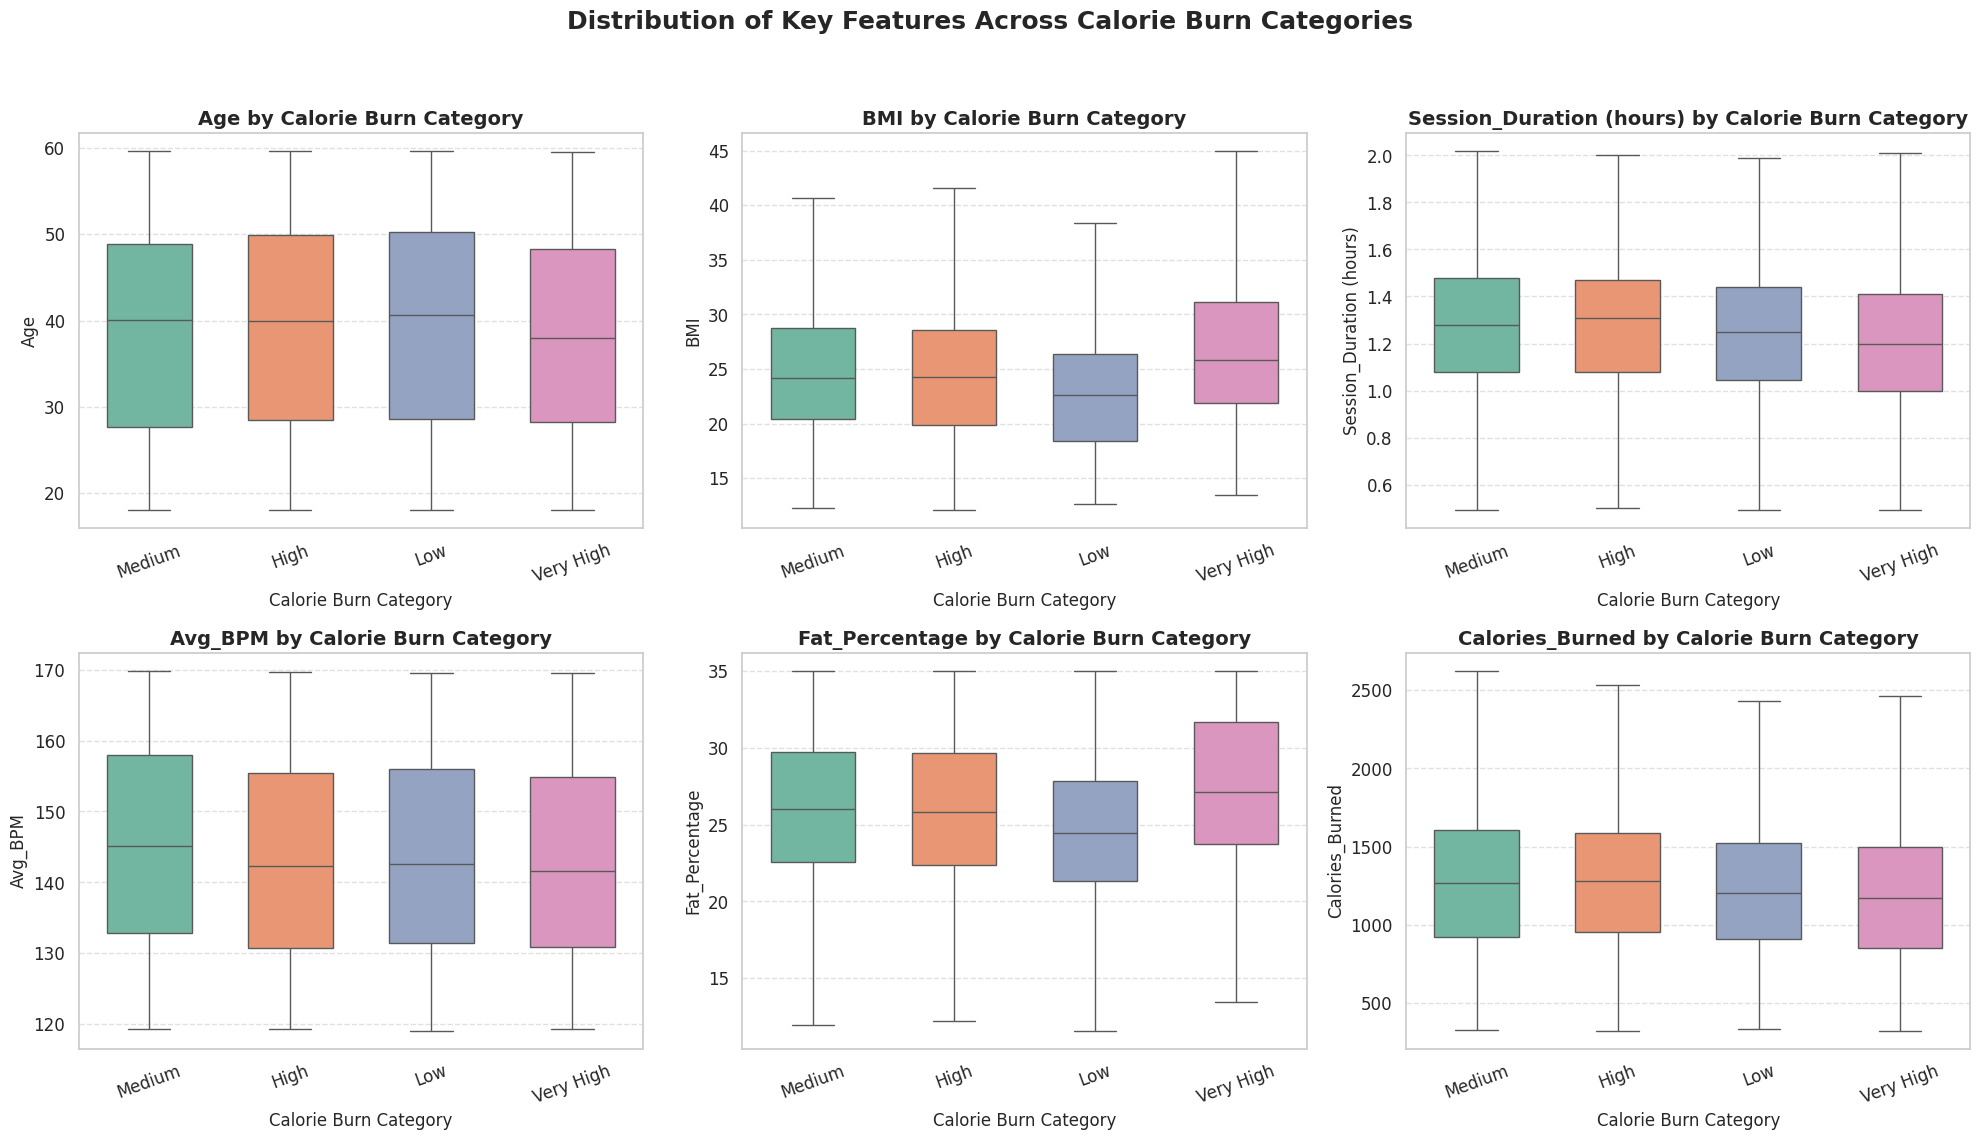

In [8]:
sns.set_theme(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

box_features = [
    'Age',
    'BMI',
    'Session_Duration (hours)',
    'Avg_BPM',
    'Fat_Percentage',
    'Calories_Burned'
]

for idx, feature in enumerate(box_features):
    sns.boxplot(
        data=df,
        x='Burns_Calories_Bin',
        y=feature,
        ax=axes[idx],
        showfliers=False,
        palette='Set2',
        width=0.6
    )

    axes[idx].set_title(
        f'{feature} by Calorie Burn Category',
        fontsize=14,
        fontweight='bold'
    )
    axes[idx].set_xlabel('Calorie Burn Category', fontsize=12)
    axes[idx].set_ylabel(feature, fontsize=12)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)
    axes[idx].tick_params(axis='x', rotation=20)

plt.suptitle(
    'Distribution of Key Features Across Calorie Burn Categories',
    fontsize=18,
    fontweight='bold'
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


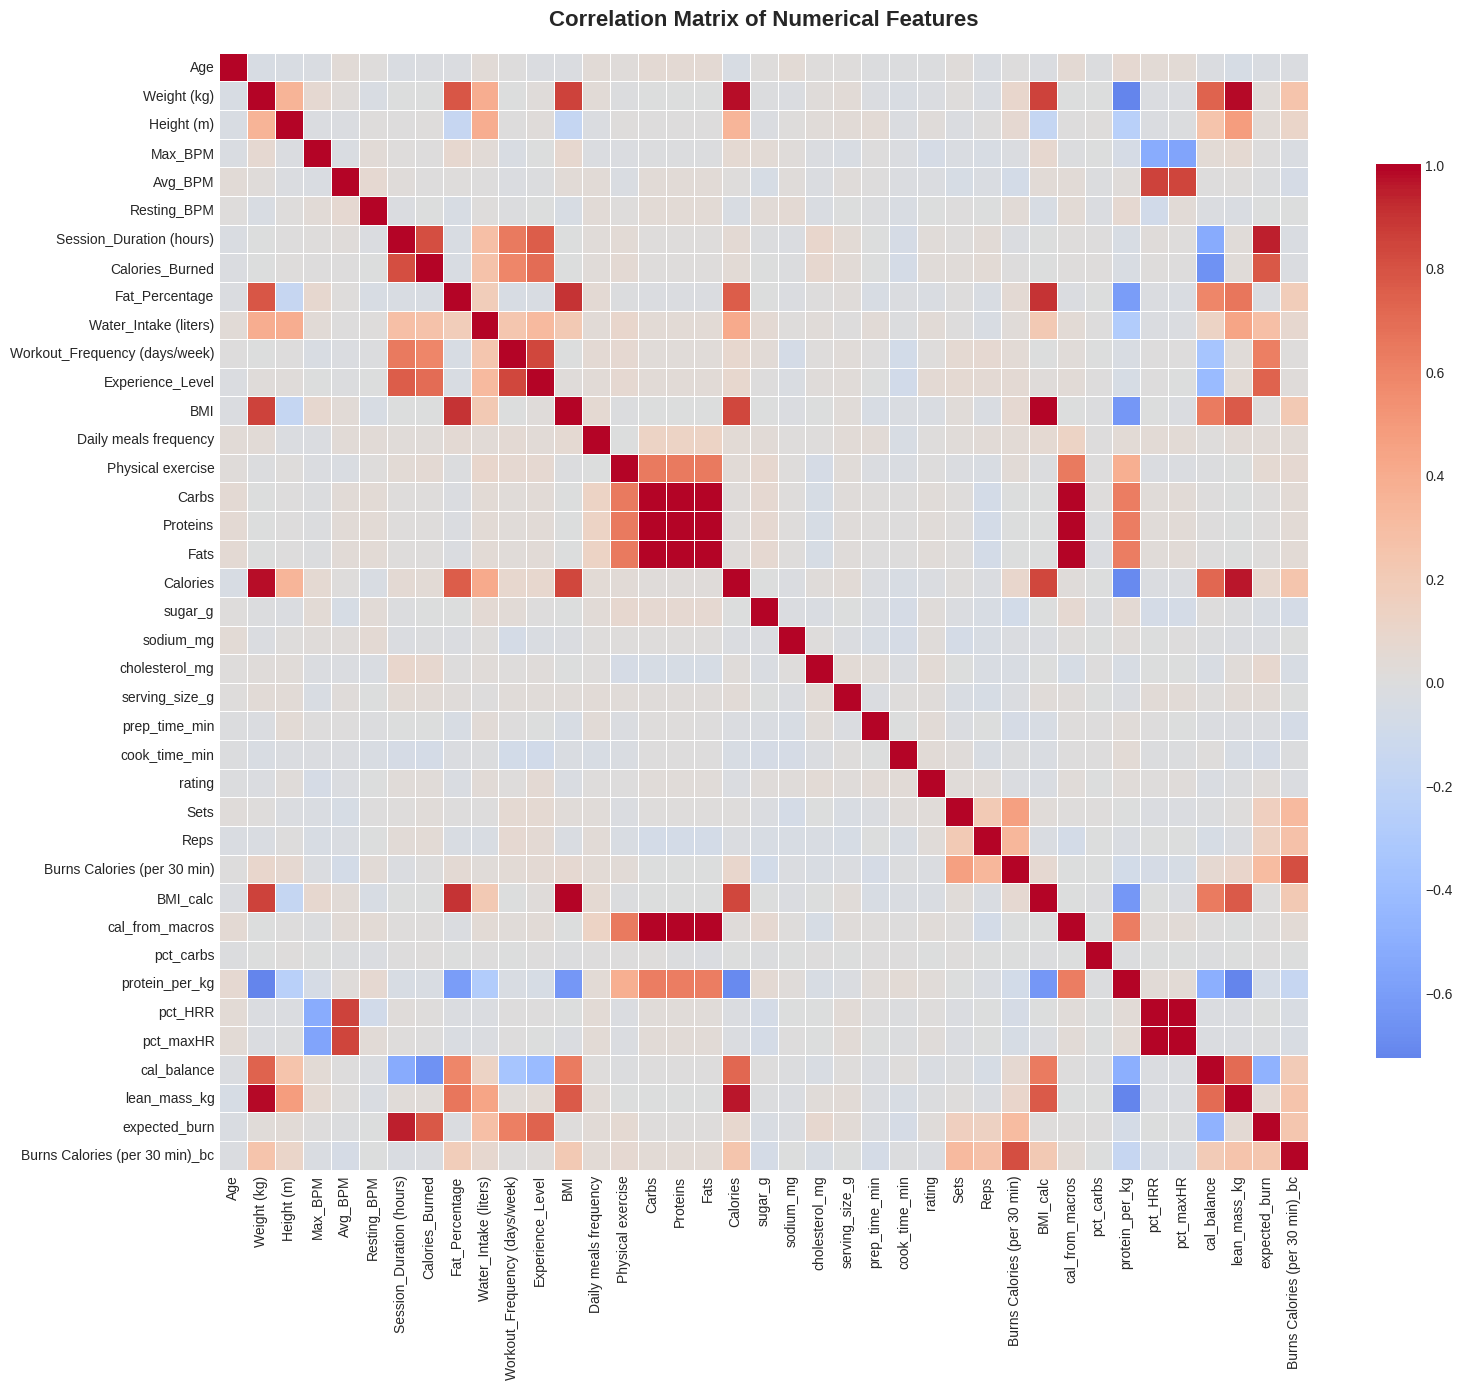

Insight: The correlation matrix shows relationships between numerical features.
Strong correlations exist between BMI and weight, and between session duration and calories burned.


In [12]:
# Correlation analysis for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Insight: The correlation matrix shows relationships between numerical features.")
print("Strong correlations exist between BMI and weight, and between session duration and calories burned.")

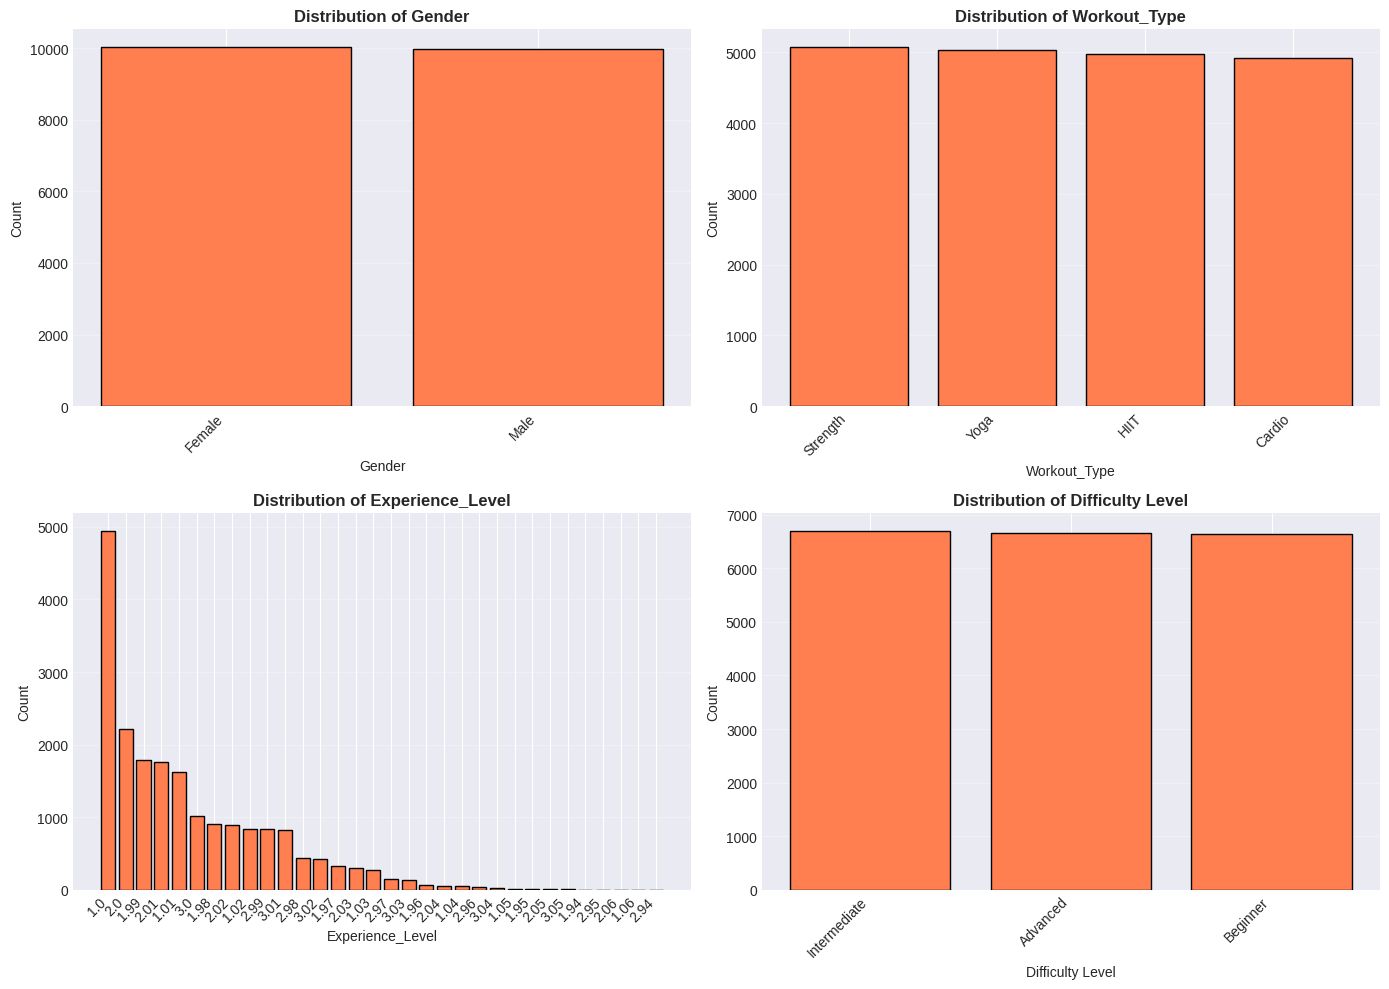

Insight: Categorical features show the distribution of workout types, experience levels, and difficulty.
The dataset includes diverse workout types and experience levels.


In [13]:
# Analyze categorical features
categorical_features = ['Gender', 'Workout_Type', 'Experience_Level', 'Difficulty Level']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    feature_counts = df[feature].value_counts()
    axes[idx].bar(range(len(feature_counts)), feature_counts.values,
                  color='coral', edgecolor='black')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_xticks(range(len(feature_counts)))
    axes[idx].set_xticklabels(feature_counts.index, rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Categorical features show the distribution of workout types, experience levels, and difficulty.")
print("The dataset includes diverse workout types and experience levels.")

### 3.3 Data Preprocessing for Modeling

In [14]:
# Prepare data for modeling
# Select relevant features and handle categorical variables

# Create a copy of the dataframe
df_model = df.copy()

# Identify categorical columns (excluding target)
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Burns_Calories_Bin')

print(f"Categorical columns to encode: {len(categorical_cols)}")
print(categorical_cols[:10])  # Show first 10

# Label encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df_model['target_encoded'] = target_encoder.fit_transform(df_model['Burns_Calories_Bin'])

print("\nTarget encoding:")
for i, label in enumerate(target_encoder.classes_):
    print(f"{label}: {i}")

print("\nData preprocessing completed!")

Categorical columns to encode: 14
['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed']

Target encoding:
High: 0
Low: 1
Medium: 2
Very High: 3

Data preprocessing completed!


In [15]:
# Prepare features and target
X = df_model.drop(['Burns_Calories_Bin', 'target_encoded'], axis=1)
y = df_model['target_encoded']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())

Feature matrix shape: (20000, 53)
Target vector shape: (20000,)

Feature columns (53):
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

Training set size: 16000 samples
Testing set size: 4000 samples

Training set class distribution:
target_encoded
0    4000
1    4002
2    3998
3    4000
Name: count, dtype: int64

Testing set class distribution:
target_encoded
0    1000
1    1001
2     999
3    1000
Name: count, dtype: int64


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training data shape: (16000, 53)
Scaled testing data shape: (4000, 53)


---
## 4. Task 1: Neural Network Model

### 4.1 Model Architecture

Building a Multi-Layer Perceptron (MLP) classifier with the following architecture:
- **Input Layer:** 52 features (all available features)
- **Hidden Layers:** Two hidden layers with 100 and 50 neurons respectively
- **Activation Function:** ReLU (Rectified Linear Unit) for hidden layers
- **Output Layer:** 4 neurons (one for each class) with softmax activation
- **Loss Function:** Cross-entropy loss
- **Optimizer:** Adam optimizer
- **Regularization:** L2 regularization (alpha=0.0001)

In [18]:
# Build Neural Network Model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    verbose=False,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

print("Neural Network Architecture:")
print("="*50)
print(f"Input Layer: {X_train_scaled.shape[1]} features")
print(f"Hidden Layer 1: 100 neurons (ReLU activation)")
print(f"Hidden Layer 2: 50 neurons (ReLU activation)")
print(f"Output Layer: {len(np.unique(y_train))} neurons (Softmax activation)")
print(f"Optimizer: Adam")
print(f"Loss Function: Cross-entropy")
print(f"L2 Regularization: alpha=0.0001")

Neural Network Architecture:
Input Layer: 53 features
Hidden Layer 1: 100 neurons (ReLU activation)
Hidden Layer 2: 50 neurons (ReLU activation)
Output Layer: 4 neurons (Softmax activation)
Optimizer: Adam
Loss Function: Cross-entropy
L2 Regularization: alpha=0.0001


In [19]:
# Train the Neural Network
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print(f"Training completed in {nn_model.n_iter_} iterations")
print(f"Final training loss: {nn_model.loss_:.4f}")

Training Neural Network...
Training completed in 21 iterations
Final training loss: 0.0241


### 4.2 Model Evaluation

In [20]:
# Make predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics for training set
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
train_precision_nn = precision_score(y_train, y_train_pred_nn, average='weighted')
train_recall_nn = recall_score(y_train, y_train_pred_nn, average='weighted')
train_f1_nn = f1_score(y_train, y_train_pred_nn, average='weighted')

# Calculate metrics for testing set
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn, average='weighted')
test_recall_nn = recall_score(y_test, y_test_pred_nn, average='weighted')
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted')

print("Neural Network Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  Accuracy:  {train_accuracy_nn:.4f}")
print(f"  Precision: {train_precision_nn:.4f}")
print(f"  Recall:    {train_recall_nn:.4f}")
print(f"  F1-Score:  {train_f1_nn:.4f}")

print("\nTesting Set Metrics:")
print(f"  Accuracy:  {test_accuracy_nn:.4f}")
print(f"  Precision: {test_precision_nn:.4f}")
print(f"  Recall:    {test_recall_nn:.4f}")
print(f"  F1-Score:  {test_f1_nn:.4f}")

Neural Network Performance:

Training Set Metrics:
  Accuracy:  0.9829
  Precision: 0.9829
  Recall:    0.9829
  F1-Score:  0.9829

Testing Set Metrics:
  Accuracy:  0.9660
  Precision: 0.9660
  Recall:    0.9660
  F1-Score:  0.9660


In [21]:
# Detailed classification report
print("\nDetailed Classification Report (Test Set):")
print("="*60)
print(classification_report(y_test, y_test_pred_nn,
                          target_names=target_encoder.classes_))


Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.97      0.95      0.96      1000
         Low       0.97      0.97      0.97      1001
      Medium       0.95      0.96      0.96       999
   Very High       0.97      0.98      0.98      1000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



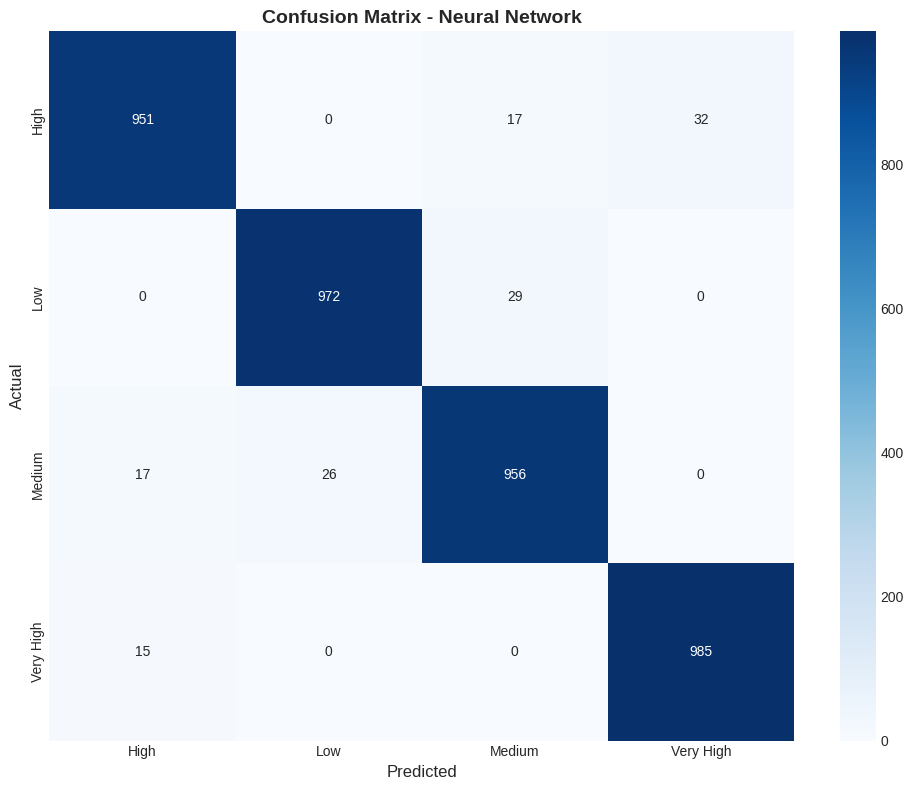

Insight: The confusion matrix shows the classification performance across all categories.
Diagonal elements represent correct predictions.


In [22]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix - Neural Network', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("Insight: The confusion matrix shows the classification performance across all categories.")
print("Diagonal elements represent correct predictions.")

---
## 5. Task 2: Classical ML Models

### 5.1 Model 1: Random Forest Classifier

In [23]:
# Build Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("Random Forest Classifier Configuration:")
print("="*50)
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Max depth: {rf_model.max_depth}")
print(f"Min samples split: {rf_model.min_samples_split}")
print(f"Min samples leaf: {rf_model.min_samples_leaf}")

# Train the model
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)
print("Training completed!")

Random Forest Classifier Configuration:
Number of trees: 100
Max depth: None
Min samples split: 2
Min samples leaf: 1

Training Random Forest...
Training completed!


In [24]:
# Evaluate Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Training metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Testing metrics
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("Random Forest Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  Accuracy:  {train_accuracy_rf:.4f}")
print(f"  Precision: {train_precision_rf:.4f}")
print(f"  Recall:    {train_recall_rf:.4f}")
print(f"  F1-Score:  {train_f1_rf:.4f}")

print("\nTesting Set Metrics:")
print(f"  Accuracy:  {test_accuracy_rf:.4f}")
print(f"  Precision: {test_precision_rf:.4f}")
print(f"  Recall:    {test_recall_rf:.4f}")
print(f"  F1-Score:  {test_f1_rf:.4f}")

Random Forest Performance:

Training Set Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Testing Set Metrics:
  Accuracy:  0.9998
  Precision: 0.9998
  Recall:    0.9998
  F1-Score:  0.9997


### 5.2 Model 2: Logistic Regression

In [25]:
# Build Logistic Regression Model
lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

print("Logistic Regression Configuration:")
print("="*50)
print(f"Solver: {lr_model.solver}")
print(f"Multi-class: {lr_model.multi_class}")
print(f"Max iterations: {lr_model.max_iter}")

# Train the model
print("\nTraining Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print("Training completed!")

Logistic Regression Configuration:
Solver: lbfgs
Multi-class: multinomial
Max iterations: 1000

Training Logistic Regression...
Training completed!


In [26]:
# Evaluate Logistic Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Training metrics
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr, average='weighted')
train_recall_lr = recall_score(y_train, y_train_pred_lr, average='weighted')
train_f1_lr = f1_score(y_train, y_train_pred_lr, average='weighted')

# Testing metrics
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr, average='weighted')
test_recall_lr = recall_score(y_test, y_test_pred_lr, average='weighted')
test_f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted')

print("Logistic Regression Performance:")
print("="*60)
print("\nTraining Set Metrics:")
print(f"  Accuracy:  {train_accuracy_lr:.4f}")
print(f"  Precision: {train_precision_lr:.4f}")
print(f"  Recall:    {train_recall_lr:.4f}")
print(f"  F1-Score:  {train_f1_lr:.4f}")

print("\nTesting Set Metrics:")
print(f"  Accuracy:  {test_accuracy_lr:.4f}")
print(f"  Precision: {test_precision_lr:.4f}")
print(f"  Recall:    {test_recall_lr:.4f}")
print(f"  F1-Score:  {test_f1_lr:.4f}")

Logistic Regression Performance:

Training Set Metrics:
  Accuracy:  0.9841
  Precision: 0.9841
  Recall:    0.9841
  F1-Score:  0.9841

Testing Set Metrics:
  Accuracy:  0.9795
  Precision: 0.9795
  Recall:    0.9795
  F1-Score:  0.9795


### 5.3 Initial Model Comparison

In [27]:
# Compare initial models
initial_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Train_Accuracy': [train_accuracy_rf, train_accuracy_lr],
    'Test_Accuracy': [test_accuracy_rf, test_accuracy_lr],
    'Test_Precision': [test_precision_rf, test_precision_lr],
    'Test_Recall': [test_recall_rf, test_recall_lr],
    'Test_F1': [test_f1_rf, test_f1_lr]
})

print("Initial Model Comparison:")
print("="*80)
print(initial_comparison.to_string(index=False))

best_initial = initial_comparison.loc[initial_comparison['Test_Accuracy'].idxmax(), 'Model']
print(f"\nBest performing model (initial): {best_initial}")

Initial Model Comparison:
              Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  Test_F1
      Random Forest        1.000000        0.99975        0.999750      0.99975 0.999750
Logistic Regression        0.984125        0.97950        0.979519      0.97950 0.979507

Best performing model (initial): Random Forest


---
## 6. Task 3: Hyperparameter Optimization

### 6.1 Random Forest Hyperparameter Tuning

In [28]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Random Forest Hyperparameter Grid:")
print("="*50)
for param, values in rf_param_grid.items():
    print(f"{param}: {values}")

# Perform GridSearchCV
print("\nPerforming Grid Search with 5-fold Cross-Validation...")
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(rf_grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {rf_grid_search.best_score_:.4f}")

Random Forest Hyperparameter Grid:
n_estimators: [50, 100, 200]
max_depth: [10, 20, None]
min_samples_split: [2, 5, 10]
min_samples_leaf: [1, 2, 4]

Performing Grid Search with 5-fold Cross-Validation...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-Validation Score: 0.9999


### 6.2 Logistic Regression Hyperparameter Tuning

In [29]:
# Define hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

print("Logistic Regression Hyperparameter Grid:")
print("="*50)
for param, values in lr_param_grid.items():
    print(f"{param}: {values}")

# Perform GridSearchCV
print("\nPerforming Grid Search with 5-fold Cross-Validation...")
lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42, n_jobs=-1),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters for Logistic Regression:")
print(lr_grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {lr_grid_search.best_score_:.4f}")

Logistic Regression Hyperparameter Grid:
C: [0.001, 0.01, 0.1, 1, 10, 100]
penalty: ['l2']
solver: ['lbfgs', 'saga']

Performing Grid Search with 5-fold Cross-Validation...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for Logistic Regression:
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best Cross-Validation Score: 0.9936


### 6.3 Hyperparameter Optimization Summary

In [30]:
# Summary of hyperparameter optimization
print("Hyperparameter Optimization Summary:")
print("="*70)

print("\nRandom Forest:")
print(f"  Best CV Score: {rf_grid_search.best_score_:.4f}")
print(f"  Best Parameters: {rf_grid_search.best_params_}")

print("\nLogistic Regression:")
print(f"  Best CV Score: {lr_grid_search.best_score_:.4f}")
print(f"  Best Parameters: {lr_grid_search.best_params_}")

Hyperparameter Optimization Summary:

Random Forest:
  Best CV Score: 0.9999
  Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Logistic Regression:
  Best CV Score: 0.9936
  Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


---
## 7. Task 4: Feature Selection

### 7.1 Feature Selection using SelectKBest

In [31]:
# Apply SelectKBest feature selection
k_features = 12  # Select top 12 features

selector = SelectKBest(score_func=f_classif, k=k_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

print(f"Feature Selection using SelectKBest (f_classif)")
print("="*70)
print(f"\nNumber of features selected: {k_features}")
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

Feature Selection using SelectKBest (f_classif)

Number of features selected: 12

Selected features:
 1. Weight (kg)
 2. Fat_Percentage
 3. BMI
 4. Calories
 5. Sets
 6. Reps
 7. Burns Calories (per 30 min)
 8. BMI_calc
 9. cal_balance
10. lean_mass_kg
11. expected_burn
12. Burns Calories (per 30 min)_bc


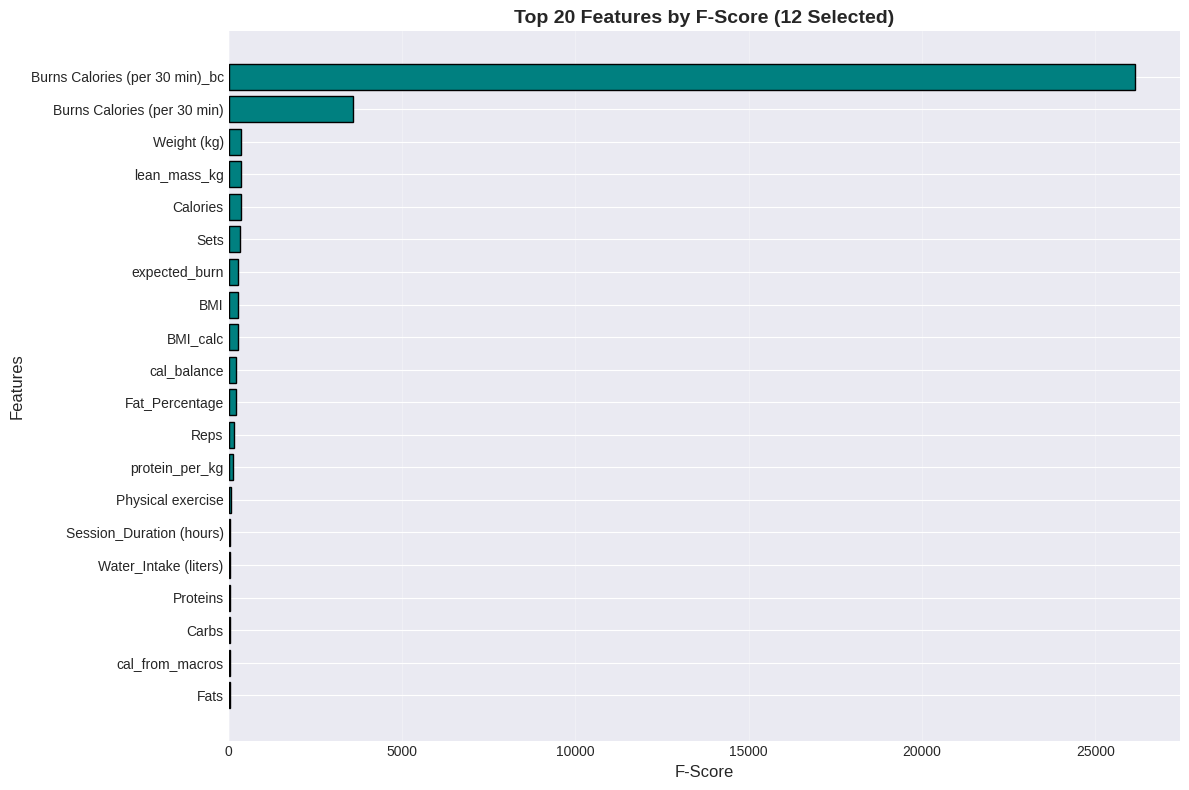

Insight: The bar chart shows the importance scores of the top features.
Features with higher F-scores have stronger relationships with the target variable.


In [32]:
# Visualize feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_scores.head(20)
plt.barh(range(len(top_features)), top_features['Score'], color='teal', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Features by F-Score (12 Selected)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Insight: The bar chart shows the importance scores of the top features.")
print("Features with higher F-scores have stronger relationships with the target variable.")

In [33]:
# Scale selected features for Logistic Regression
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

print(f"Selected features scaled successfully!")
print(f"Training set shape: {X_train_selected_scaled.shape}")
print(f"Testing set shape: {X_test_selected_scaled.shape}")

Selected features scaled successfully!
Training set shape: (16000, 12)
Testing set shape: (4000, 12)


---
## 8. Task 5: Final Models and Comparison

### 8.1 Final Random Forest Model

In [34]:
# Build final Random Forest with optimized hyperparameters and selected features
final_rf = RandomForestClassifier(
    **rf_grid_search.best_params_,
    random_state=42,
    n_jobs=-1
)

print("Final Random Forest Model Configuration:")
print("="*50)
print(f"Features used: {k_features} selected features")
print(f"Hyperparameters: {rf_grid_search.best_params_}")

# Train the model
final_rf.fit(X_train_selected, y_train)

# Calculate CV score
rf_cv_scores = cross_val_score(final_rf, X_train_selected, y_train, cv=5, scoring='accuracy')
rf_cv_score = rf_cv_scores.mean()

# Make predictions
y_test_pred_final_rf = final_rf.predict(X_test_selected)

# Calculate metrics
final_rf_accuracy = accuracy_score(y_test, y_test_pred_final_rf)
final_rf_precision = precision_score(y_test, y_test_pred_final_rf, average='weighted')
final_rf_recall = recall_score(y_test, y_test_pred_final_rf, average='weighted')
final_rf_f1 = f1_score(y_test, y_test_pred_final_rf, average='weighted')

print("\nFinal Random Forest Performance:")
print(f"  CV Score:  {rf_cv_score:.4f}")
print(f"  Accuracy:  {final_rf_accuracy:.4f}")
print(f"  Precision: {final_rf_precision:.4f}")
print(f"  Recall:    {final_rf_recall:.4f}")
print(f"  F1-Score:  {final_rf_f1:.4f}")

Final Random Forest Model Configuration:
Features used: 12 selected features
Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Final Random Forest Performance:
  CV Score:  0.9999
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


### 8.2 Final Logistic Regression Model

In [35]:
# Build final Logistic Regression with optimized hyperparameters and selected features
final_lr = LogisticRegression(
    **lr_grid_search.best_params_,
    max_iter=1000,
    multi_class='multinomial',
    random_state=42,
    n_jobs=-1
)

print("Final Logistic Regression Model Configuration:")
print("="*50)
print(f"Features used: {k_features} selected features")
print(f"Hyperparameters: {lr_grid_search.best_params_}")

# Train the model
final_lr.fit(X_train_selected_scaled, y_train)

# Calculate CV score
lr_cv_scores = cross_val_score(final_lr, X_train_selected_scaled, y_train, cv=5, scoring='accuracy')
lr_cv_score = lr_cv_scores.mean()

# Make predictions
y_test_pred_final_lr = final_lr.predict(X_test_selected_scaled)

# Calculate metrics
final_lr_accuracy = accuracy_score(y_test, y_test_pred_final_lr)
final_lr_precision = precision_score(y_test, y_test_pred_final_lr, average='weighted')
final_lr_recall = recall_score(y_test, y_test_pred_final_lr, average='weighted')
final_lr_f1 = f1_score(y_test, y_test_pred_final_lr, average='weighted')

print("\nFinal Logistic Regression Performance:")
print(f"  CV Score:  {lr_cv_score:.4f}")
print(f"  Accuracy:  {final_lr_accuracy:.4f}")
print(f"  Precision: {final_lr_precision:.4f}")
print(f"  Recall:    {final_lr_recall:.4f}")
print(f"  F1-Score:  {final_lr_f1:.4f}")

Final Logistic Regression Model Configuration:
Features used: 12 selected features
Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Final Logistic Regression Performance:
  CV Score:  0.9962
  Accuracy:  0.9972
  Precision: 0.9973
  Recall:    0.9972
  F1-Score:  0.9973


### 8.3 Final Model Comparison

In [36]:
# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Features': [k_features, k_features],
    'CV Score': [rf_cv_score, lr_cv_score],
    'Accuracy': [final_rf_accuracy, final_lr_accuracy],
    'Precision': [final_rf_precision, final_lr_precision],
    'Recall': [final_rf_recall, final_lr_recall],
    'F1-Score': [final_rf_f1, final_lr_f1]
})

print("Final Model Comparison:")
print("="*100)
print(final_comparison.to_string(index=False))

# Identify best model
best_model_idx = final_comparison['Accuracy'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_accuracy = final_comparison.loc[best_model_idx, 'Accuracy']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")

Final Model Comparison:
              Model  Features  CV Score  Accuracy  Precision  Recall  F1-Score
      Random Forest        12  0.999938   1.00000   1.000000 1.00000  1.000000
Logistic Regression        12  0.996187   0.99725   0.997253 0.99725  0.997251

Best Performing Model: Random Forest
Test Accuracy: 1.0000


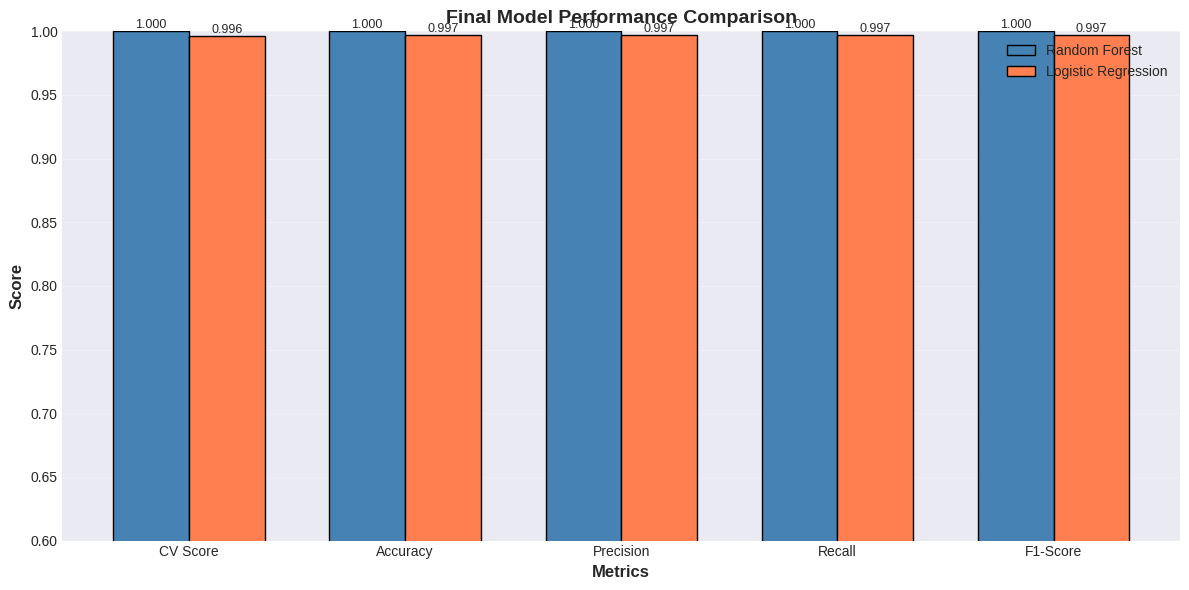

Insight: The bar chart compares all performance metrics between the two final models.
Both models show strong performance after optimization and feature selection.


In [37]:
# Visualize model comparison
metrics = ['CV Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_scores = [rf_cv_score, final_rf_accuracy, final_rf_precision, final_rf_recall, final_rf_f1]
lr_scores = [lr_cv_score, final_lr_accuracy, final_lr_precision, final_lr_recall, final_lr_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='steelblue', edgecolor='black')
bars2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', color='coral', edgecolor='black')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Final Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.6, 1.0])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Insight: The bar chart compares all performance metrics between the two final models.")
print("Both models show strong performance after optimization and feature selection.")

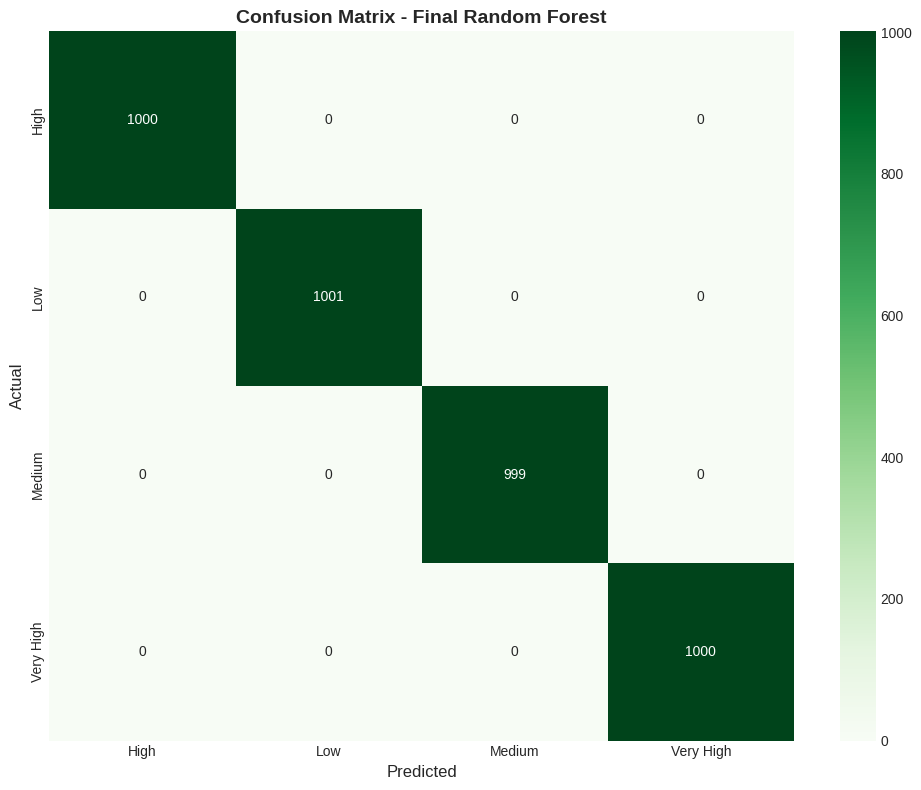


Detailed Classification Report - Final Random Forest:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1000
         Low       1.00      1.00      1.00      1001
      Medium       1.00      1.00      1.00       999
   Very High       1.00      1.00      1.00      1000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [38]:
# Confusion Matrix for best model
if best_model_name == 'Random Forest':
    cm_final = confusion_matrix(y_test, y_test_pred_final_rf)
    predictions_final = y_test_pred_final_rf
else:
    cm_final = confusion_matrix(y_test, y_test_pred_final_lr)
    predictions_final = y_test_pred_final_lr

plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title(f'Confusion Matrix - Final {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nDetailed Classification Report - Final {best_model_name}:")
print("="*70)
print(classification_report(y_test, predictions_final,
                          target_names=target_encoder.classes_))